In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read from json
import json

# json_file = "/workspace/patchcore-inspection/results/monuseg_results/IM224_SAM_P01_D1024-1024_PS-9_ST-4_AN-1_S0/evaluated_results/scores.json"

json_files = [
    "/workspace/patchcore-inspection/results/monuseg_results/IM224_SAM_P01_D1024-1024_PS-9_ST-4_AN-1_S0/evaluated_results/scores_v1.2.json",
    "/workspace/patchcore-inspection/results/monuseg_results/IM224_SAM_P01_D1024-1024_PS-9_ST-4_AN-1_S0/evaluated_results_v1.3/scores.json",
]

dict = {}

for json_file in json_files:
    with open(json_file, 'r') as f:
        score_dict = json.load(f)
        dict.update(score_dict)

l = len(dict)
print(len(dict))
print(np.random.choice(list(dict.keys()), 100, replace=False))

19307
['./monuseg/test/syn/v1.2_output_model_s1.2_050000/samples/TCGA-B0-5698-01Z-00-DX1_022.png'
 './monuseg/test/syn/v1.2_output_model_s1.4_050000/samples/TCGA-A7-A13F-01Z-00-DX1_044.png'
 './monuseg/test/syn/v1.2_output_model_s1.6_040000/samples/TCGA-G9-6336-01Z-00-DX1_016.png'
 './monuseg/test/syn/v1.2_output_model_s1.5_040000/samples/TCGA-E2-A14V-01Z-00-DX1_014.png'
 './monuseg/test/syn/v1.2_output_model_s1.6_030000/samples/TCGA-B0-5710-01Z-00-DX1_034.png'
 './monuseg/test/syn/v1.3_output_model_s1.2_050000/samples/TCGA-E2-A1B5-01Z-00-DX1_061.png'
 './monuseg/test/syn/v1.2_output_model_s1.2_040000/samples/TCGA-38-6178-01Z-00-DX1_002.png'
 './monuseg/test/syn/v1.3_output_model_s1.2_050000/samples/TCGA-B0-5711-01Z-00-DX1_063.png'
 './monuseg/test/syn/v1.3_output_model_s1.5_030000/samples/TCGA-G9-6356-01Z-00-DX1_053.png'
 './monuseg/test/syn/v1.3_output_model_s1.2_050000/samples/TCGA-E2-A14V-01Z-00-DX1_035.png'
 './monuseg/test/syn/v1.2_output_model_s1.6_040000/samples/TCGA-NH-A8F7-01

In [28]:
scores = {
    'scores' : [],
    'class' : []
}

for k, v in dict.items():
    scores['scores'].append(v)
    # print(k)
    if 'gt' in k: scores["class"].append('gt')
    elif 'v1.2' in k: scores["class"].append('syn_v1.2')
    elif 'v1.3' in k: scores["class"].append('syn_v1.3')
    else :
        print(k)
        raise NotImplementedError

import numpy as np
print(np.unique(scores['class']))

['gt' 'syn_v1.2' 'syn_v1.3']


(array([-0.26666667, -0.26666667]), array([0.00689655, 0.10344828]))
(array([-0.26666667, -0.26666667]), array([0.03448276, 0.0637931 ]))
(array([-0.26666667]), array([0.04827586]))
(array([0., 0.]), array([0.        , 0.16551724]))
(array([0., 0.]), array([0.04827586, 0.09655172]))
(array([0.]), array([0.06896552]))
(array([0.26666667, 0.26666667]), array([0.        , 0.23478261]))
(array([0.26666667, 0.26666667]), array([0.06086956, 0.13043478]))
(array([0.26666667]), array([0.08695652]))


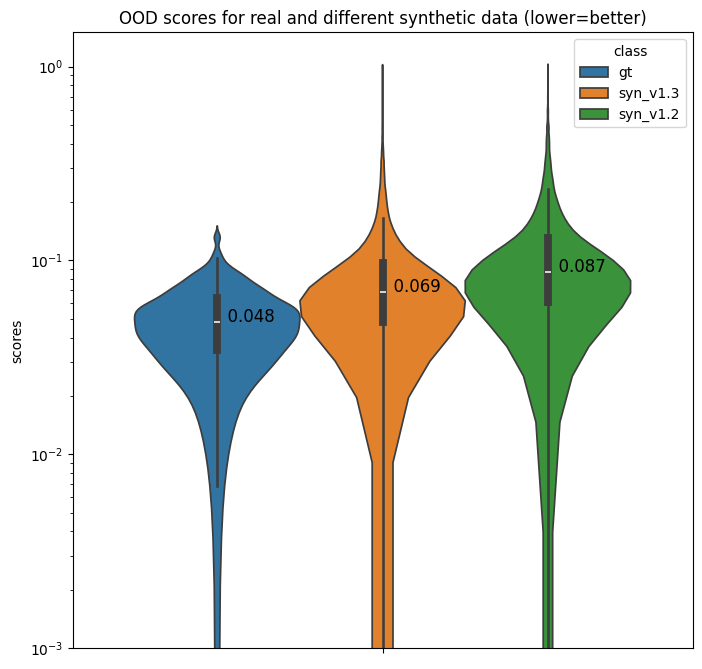

In [43]:
hue_order = ["gt", "syn_v1.3", "syn_v1.2"]

plt.figure(figsize=(8, 8))
sns.violinplot(data=scores, hue='class', y='scores', hue_order=hue_order)
ax = plt.gca()
ax.set_yscale('log')
ax.set_ybound(lower=1e-3)

for l in ax.lines:
    print(l.get_data())
    if len(l.get_data()[1]) != 1 : continue
    ax.text(l.get_data()[0][0], l.get_data()[1][0], f'  {l.get_data()[1][0]:.3f}',size='large')    

plt.title("OOD scores for real and different synthetic data (lower=better)")
plt.show()

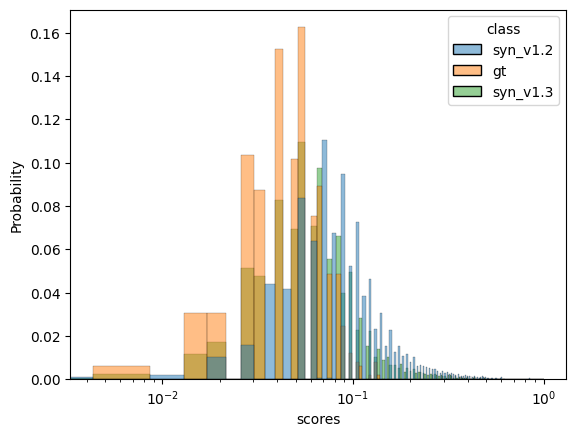

In [32]:
sns.histplot(data=scores, x="scores", hue="class", stat='probability', common_norm=False)

ax = plt.gca()
ax.set_xscale('log')
# ax.set_ybound(lower=1e-3)
plt.show()
